DATA CREATION

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)
dates = pd.date_range(start="2023-01-01", periods=365, freq="D")
readings = np.random.normal(loc=50, scale=5, size=len(dates))

# Inject anomalies (extreme values)
anomalies = np.random.choice(len(readings), size=10, replace=False)
readings[anomalies] += np.random.choice([-25, 30], size=10)

df = pd.DataFrame({
    'Date': dates,
    'Sensor_Value': readings
})
df.to_csv("sensor_data.csv", index=False)


## Tasks:
1. Plot the sensor data over time.

2. Use Z-score method to detect anomalies (|z| > 3)

3. Visualize anomalies clearly on the time series plot

4. Count number of anomalies and list the top 3 largest deviations

5. Suggest 1–2 ways to automatically flag future issues

In [2]:
df.head()

,Date,Sensor_Value
0,2023-01-01,52.483571
1,2023-01-02,49.308678
2,2023-01-03,53.238443
3,2023-01-04,57.615149
4,2023-01-05,48.829233


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          365 non-null    datetime64[ns]
 1   Sensor_Value  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [4]:
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df['Z'] = zscore(df['Sensor_Value'])
df['Anomaly'] = df['Z'].abs() > 3

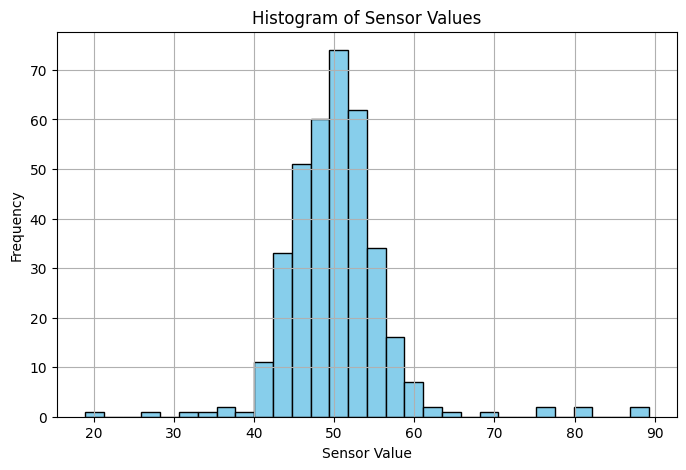

In [6]:
plt.figure(figsize=(8,5))
plt.hist(df['Sensor_Value'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Sensor Values')
plt.xlabel('Sensor Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


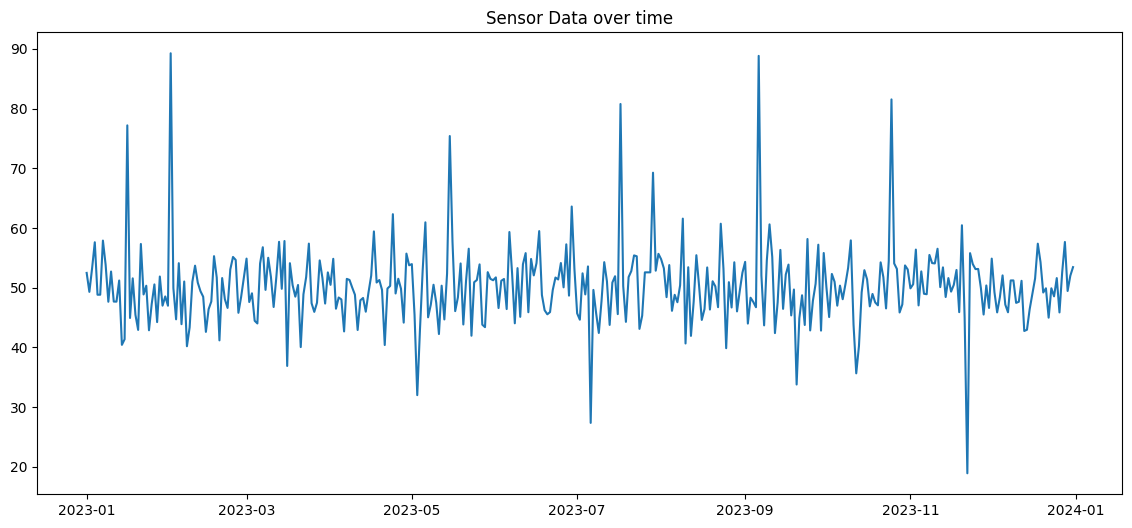

In [7]:
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Sensor_Value'])
plt.title('Sensor Data over time')
plt.show()

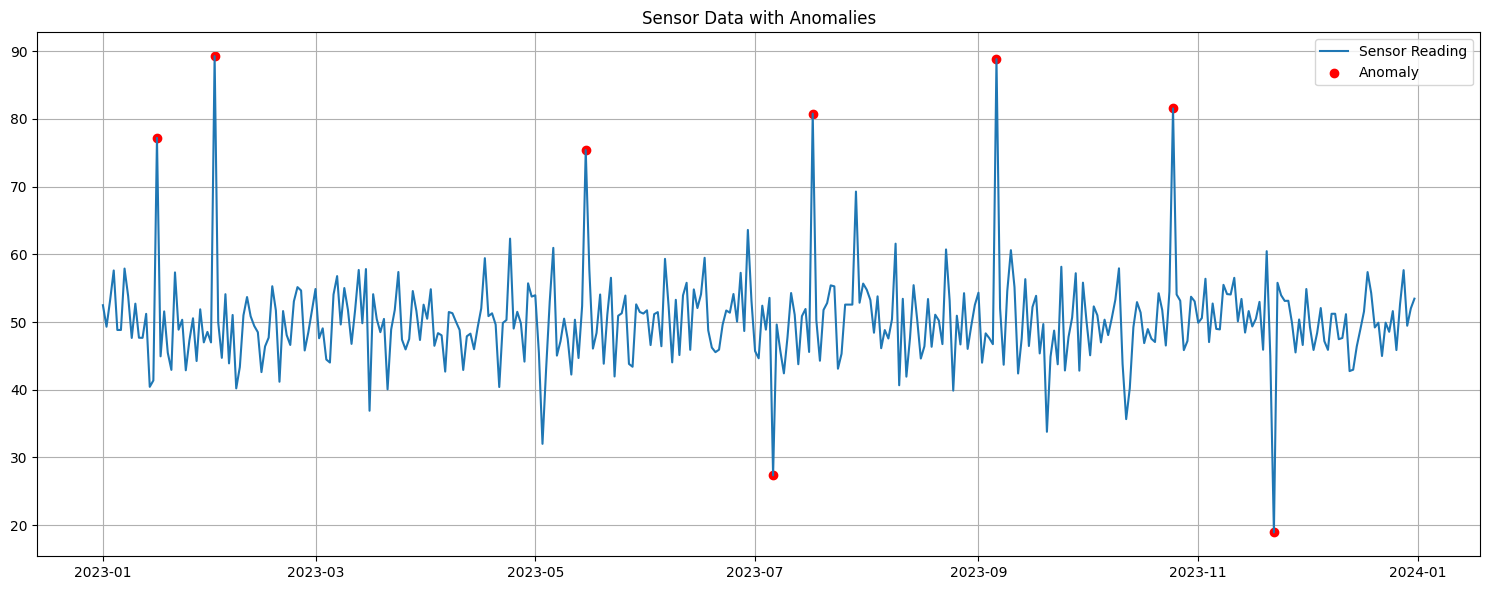

In [8]:
plt.figure(figsize=(15,6))
plt.plot(df['Date'], df['Sensor_Value'], label='Sensor Reading')
plt.scatter(df[df['Anomaly']]['Date'], df[df['Anomaly']]['Sensor_Value'], color='red', label='Anomaly')
plt.legend()
plt.title('Sensor Data with Anomalies')
plt.tight_layout()
plt.grid(True)
plt.show()


In [9]:
num_anomalies = df['Anomaly'].sum()
print(f"Total anomalies detected: {num_anomalies}")

Total anomalies detected: 8


In [16]:
df['Z'][df['Anomaly']==True]

15     4.048974
31     5.864843
134    3.780390
186   -3.444789
197    4.587450
248    5.799547
297    4.702945
325   -4.713814
Name: Z, dtype: float64

In [11]:
top3 = df[df['Anomaly']].copy()
top3['Abs_Z'] = top3['Z'].abs()
top3 = top3.sort_values(by='Abs_Z', ascending=False).head(3)

print("Top 3 anomalies with largest deviations:")
top3[['Date', 'Sensor_Value', 'Z']]


Top 3 anomalies with largest deviations:


,Date,Sensor_Value,Z
31,2023-02-01,89.261391,5.864843
248,2023-09-06,88.827271,5.799547
325,2023-11-22,18.929057,-4.713814


In [21]:
mean = df['Sensor_Value'].mean()
std = df['Sensor_Value'].std()

normal_min = mean - 3 * std
normal_max = mean + 3 * std

print(f"Range of normal variation (approx): {normal_min:.2f} to {normal_max:.2f}")


Range of normal variation (approx): 30.30 to 70.24


In [12]:
df.head()

,Date,Sensor_Value,Z,Anomaly
0,2023-01-01,52.483571,0.333106,False
1,2023-01-02,49.308678,-0.144428,False
2,2023-01-03,53.238443,0.446646,False
3,2023-01-04,57.615149,1.104945,False
4,2023-01-05,48.829233,-0.216541,False
